In [1]:
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
best_pipeline = joblib.load('../models/best_model_Random_Forest.pkl')

In [5]:
df = pd.read_csv('../data/data_clean.csv')

df = pd.get_dummies(df, columns=['Region'], drop_first=True)

df.drop(columns=['Country'], axis=1, inplace=True)

X = df.drop(columns=['Score']) 
y = df['Score'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

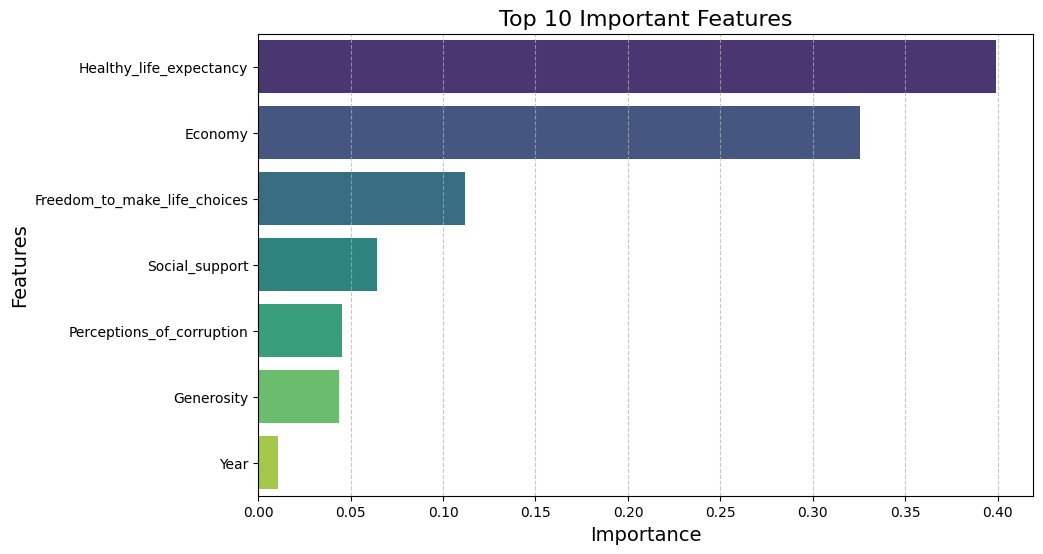

In [6]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

importances = best_pipeline.named_steps['regressor'].feature_importances_

feature_names = [col for col in num_cols if col != 'Score'] 

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis', dodge=False, hue='Feature', legend=False)
plt.title('Top 10 Important Features', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

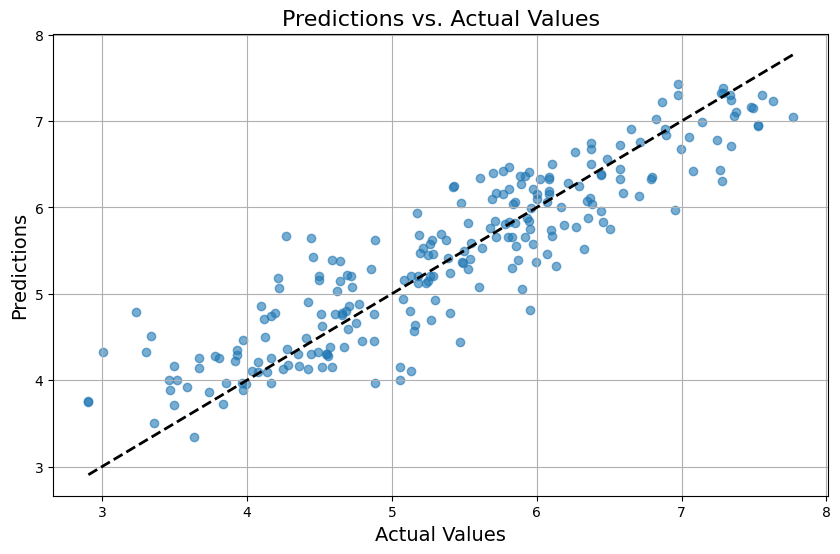

In [10]:
y_pred = best_pipeline.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predictions vs. Actual Values', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.grid()
plt.show()

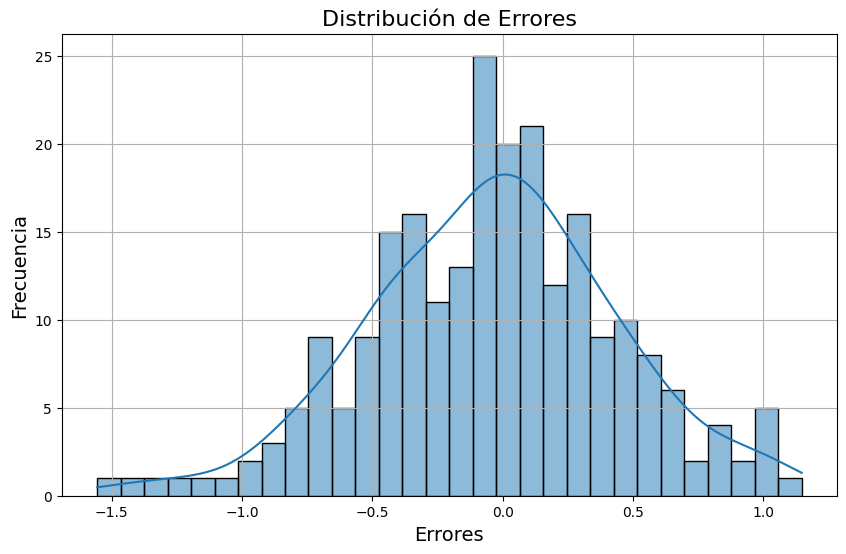

In [11]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribución de Errores', fontsize=16)
plt.xlabel('Errores', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid()
plt.show()